In [1]:
pip install smogn


   ---------------------------------------- 0/2 [tqdm]
   ---------------------------------------- 0/2 [tqdm]
   ---------------------------------------- 0/2 [tqdm]
   ---------------------------------------- 0/2 [tqdm]
   ---------------------------------------- 0/2 [tqdm]
   -------------------- ------------------- 1/2 [smogn]
   ---------------------------------------- 2/2 [smogn]

Note: you may need to restart the kernel to use updated packages.


r_index: 100%|##########| 32/32 [00:00<00:00, 1319.53it/s]


(896, 7) (225, 7) (896, 1) (225, 1)


c:\Users\suhai\AQI_forecast\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 1, 100)         │        43,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1, 1)           │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,301 (169.14 KB)

 Trainable params: 43,301 (169.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0715 - mae: 0.2015 - val_loss: 0.0229 - val_mae: 0.1245
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0223 - mae: 0.1239 - val_loss: 0.0206 - val_mae: 0.1192
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0209 - mae: 0.1140 - val_loss: 0.0190 - val_mae: 0.1137
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0186 - mae: 0.1094 - val_loss: 0.0184 - val_mae: 0.1106
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0198 - mae: 0.1083 - val_loss: 0.0183 - val_mae: 0.1087
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0181 - mae: 0.1045 - val_loss: 0.0189 - val_mae: 0.1089
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0178 - mae: 0.1023 - val_loss: 0.0209 - val_mae: 0.1134
Epoch 8/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0210 - mae: 0.1105 - val_loss: 0.0186 - val_mae: 0.1070
Epoch 9/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0192 - mae:

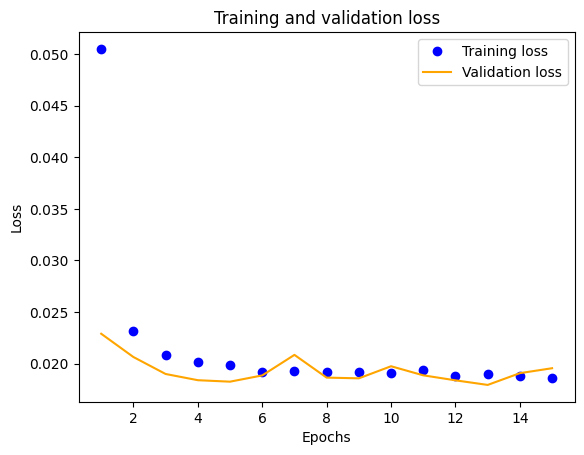

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import smogn
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df=pd.read_csv('final_data.csv')
X=df
_smogn = smogn.smoter(data=X,y='AQI')
X = _smogn.drop(['AQI'],axis=1)
Y = _smogn['AQI']
X = np.array(X)
Y = np.array(Y).reshape(-1,1)

X_train,X_test,y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state =123)
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

min_max_scaler1 = MinMaxScaler()
min_max_scaler2 = MinMaxScaler()
X_train = min_max_scaler1.fit_transform(X_train)
X_test = min_max_scaler1.transform(X_test)
y_train = min_max_scaler2.fit_transform(y_train)
y_test = min_max_scaler2.transform(y_test)

pickle.dump(min_max_scaler1, open('scaler1.pkl','wb'))
pickle.dump(min_max_scaler2, open('scaler2.pkl','wb'))

X_train = X_train.reshape((X_train.shape[0],1,X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0],1,X_test.shape[1]))

model = Sequential()
model.add(LSTM(100,input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences = True))
model.add(Dropout(0.2))
model.add(Dense(1,activation ='linear'))
model.summary()

model.compile(optimizer = 'adam', loss='mse', metrics=['mae'])
history = model.fit(X_train,y_train,
                    validation_data=(X_test, y_test),
                    epochs=15,
                    batch_size=32,
                    verbose=1)
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) +1)
plt.plot(epochs,loss_values,'bo',label="Training loss")
plt.plot(epochs, val_loss_values,'orange',label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# model.save('aqi_lstm.h5')
model.save('my_model.keras')

dist_matrix:   0%|          | 0/211 [00:00<?, ?it/s]

r_index: 100%|##########| 32/32 [00:00<00:00, 824.50it/s]


Epoch 1/50


c:\Users\suhai\AQI_forecast\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1257 - mae: 0.2920 - val_loss: 0.0302 - val_mae: 0.1397
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0283 - mae: 0.1339 - val_loss: 0.0200 - val_mae: 0.1169
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0231 - mae: 0.1219 - val_loss: 0.0177 - val_mae: 0.1080
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0199 - mae: 0.1142 - val_loss: 0.0164 - val_mae: 0.1042
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0194 - mae: 0.1104 - val_loss: 0.0158 - val_mae: 0.1014
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0209 - mae: 0.1123 - val_loss: 0.0155 - val_mae: 0.0990
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - mae: 0.1036 - val_loss: 0.0150 - val_mae: 0.0972
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0187 - mae: 0.1071 - val_loss: 0.0152 - val_mae: 0.0966
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0209 - mae: 0.1038 - v

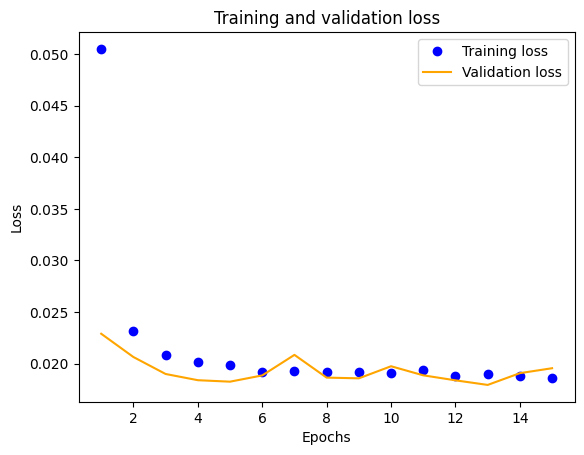

✅ Model saved as 'my_model.keras'


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import smogn
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv('final_data.csv')

# Apply SMOGN to balance AQI values
smogn_df = smogn.smoter(data=df, y='AQI')

# Split into features and target
X = smogn_df.drop(['AQI'], axis=1)
y = smogn_df['AQI']

# Convert to numpy arrays
X = np.array(X)
y = np.array(y).reshape(-1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Scaling
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)  # ✅ Use transform here
y_train = scaler2.fit_transform(y_train)
y_test = scaler2.transform(y_test)

# Save scalers for inference
pickle.dump(scaler1, open('scaler1.pkl', 'wb'))
pickle.dump(scaler2, open('scaler2.pkl', 'wb'))

# Reshape inputs for LSTM: (samples, time_steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Add early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

# Plot training and validation loss

plt.plot(epochs,loss_values,'bo',label="Training loss")
plt.plot(epochs, val_loss_values,'orange',label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Val Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# Save the model
model.save('my_model.keras')
print("✅ Model saved as 'my_model.keras'")
